<a href="https://colab.research.google.com/github/Rathna-2003/datascience/blob/main/GRIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
%matplotlib inline
sbn.set_style("darkgrid",{'grid.linestyle':'--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(dataset)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<Axes: ylabel='count'>

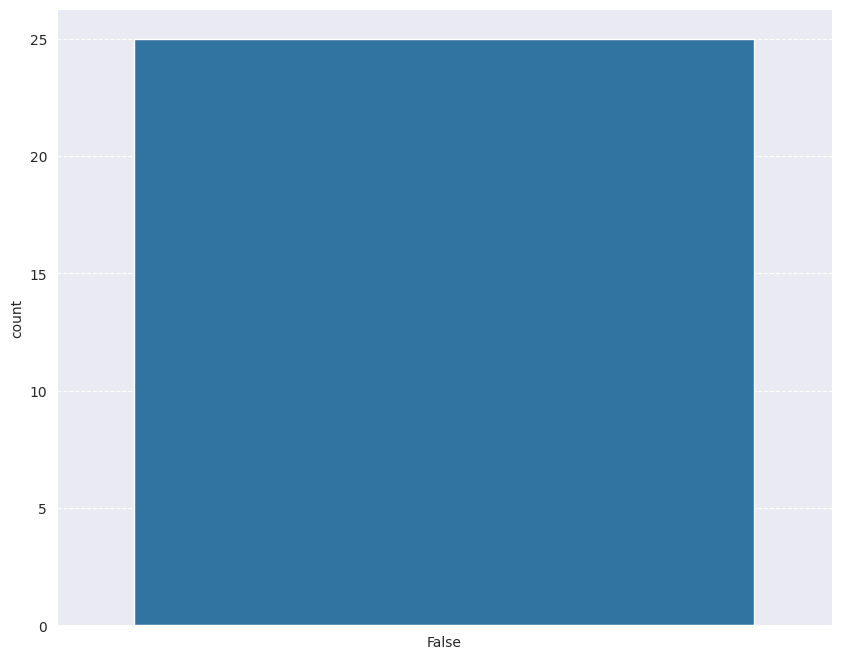

In [10]:
plt.figure(figsize=(10,8))
sbn.countplot(x=df.duplicated())

 ***VISUALIZING THE DATASET***

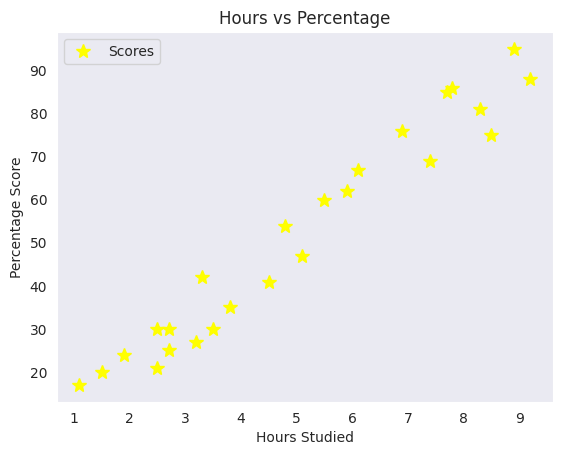

In [20]:
df.plot(x='Hours',y='Scores',style='*',color='yellow',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [15]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

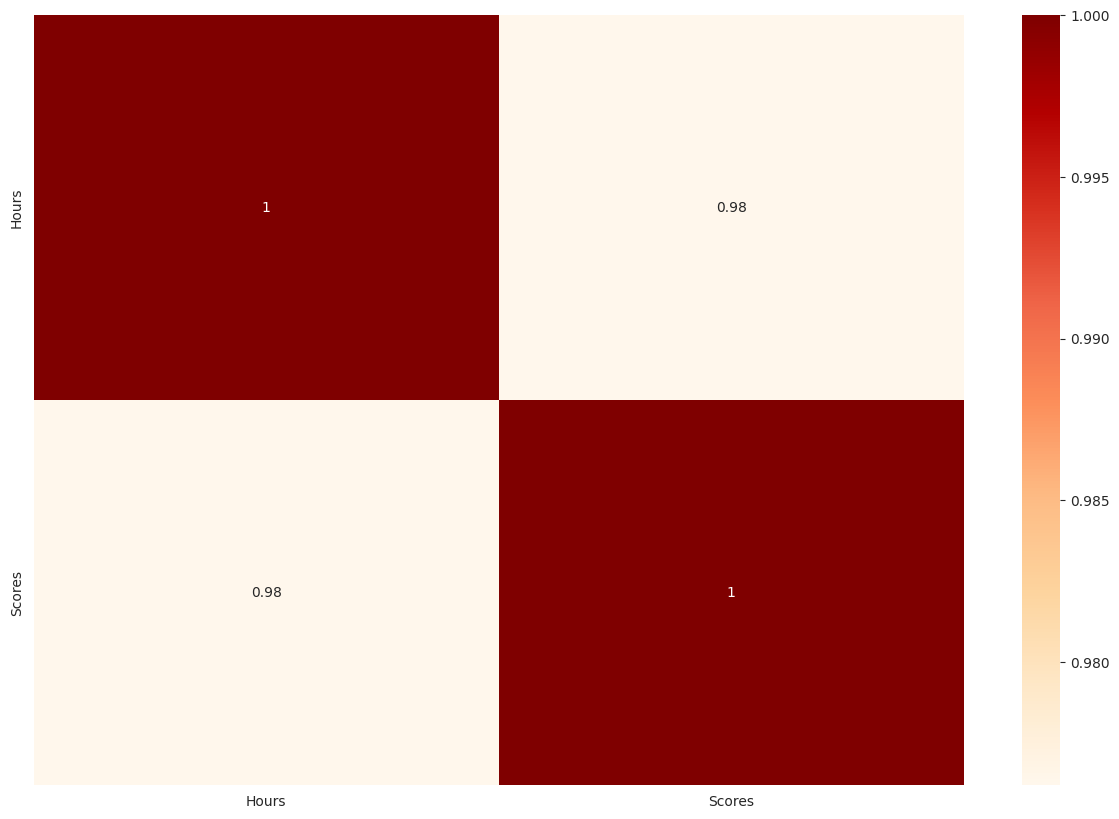

In [19]:
plt.figure(figsize=(15,10))
sbn.heatmap(df.corr(),cmap='',annot=True)

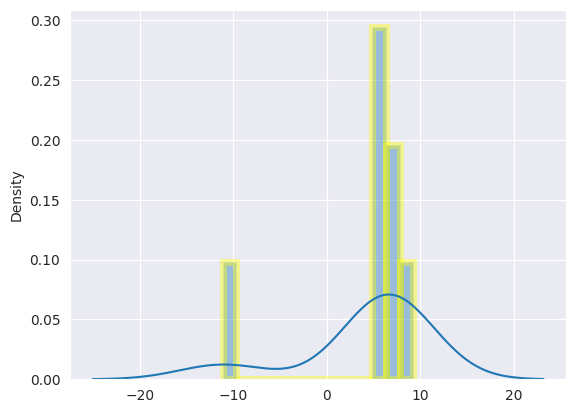

In [54]:
sbn.set_style('darkgrid')
sbn.distplot(np.array(y_test-y_pred),hist_kws=dict(edgecolor="yellow", linewidth=5))
plt.show()


<Axes: xlabel='Scores', ylabel='count'>

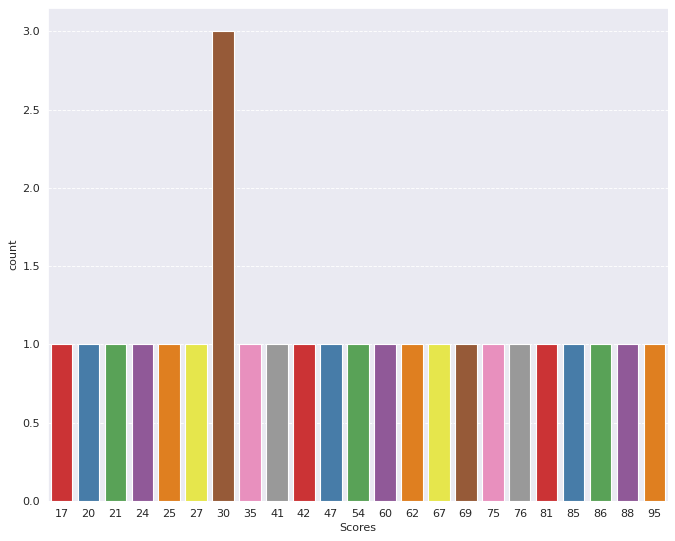

In [27]:
plt.figure(figsize=(10,8),dpi=80)
sbn.countplot(x='Scores',data=df,palette='Set1')


***DATA PREPARATION***

In [57]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:

X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_model= LinearRegression()

In [35]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=linear_model.predict(X_test)

In [37]:
y_pred


array([[10.1519013 ],
       [32.73976133],
       [18.36566858],
       [86.12924869],
       [48.14057499],
       [77.91548141],
       [61.48794684]])

In [38]:
linear_model.score(X_train, y_train)

0.965781943975883

***EVALUATING THE MODEL***

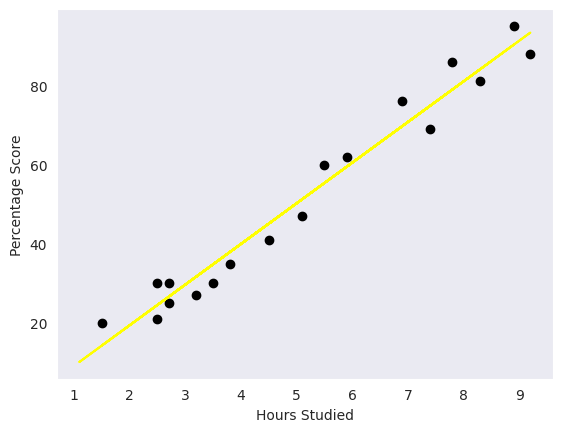

In [44]:

line = linear_model.coef_*X + linear_model.intercept_
plt.scatter(X_train, y_train, color='black')
plt.plot(X,line, color='yellow');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


In [45]:
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [46]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  print('\n================Evalution Matrix=========================\n')


#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()



================Evalution Matrix=========================

MSE : 854029.4047030656
RMSE : 924.137113583837
R2 : 0.8549378962753198
Adjusted R2 :  0.8259254755303838

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



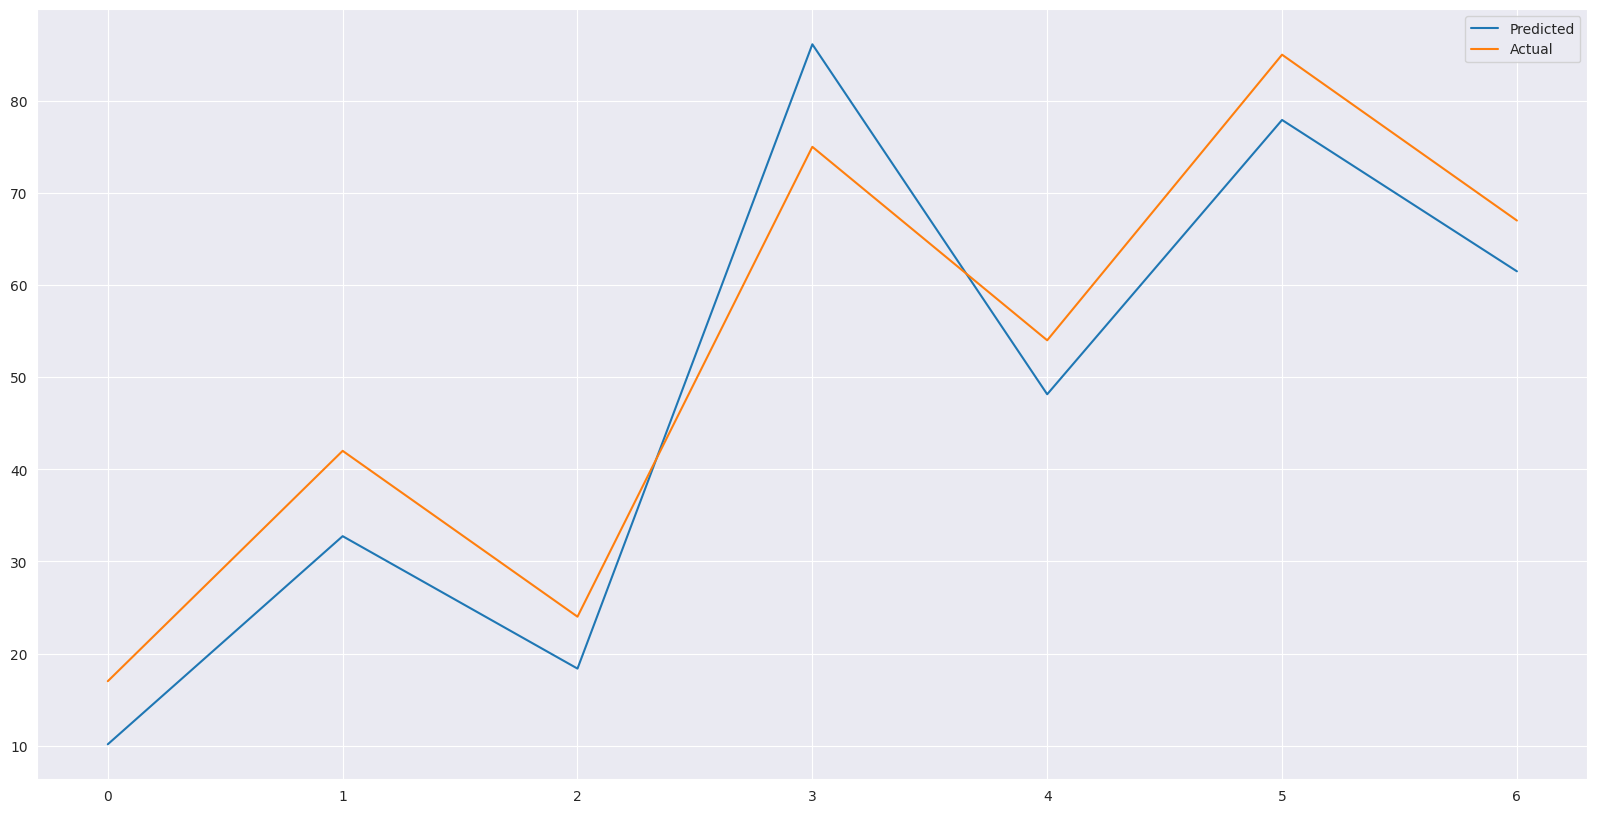

In [55]:
train_linear_model(linear_model,X_train,y_train,X_test,y_test)

***WHAT SHOULD BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS/DAY?***

In [56]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 7.3325591780007
R2 Score: 0.8980888932690289


In [48]:
# Testing with your own data

hours = 9.25
own_pred = linear_model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.82965552]
